Progetto finale - Modulo Python - Francesca Parri

In [1]:
#Per poter leggere un file csv mi serve importare la libreria pandas
import pandas as pd
import numpy as np

In [2]:
#Per leggere il file in formato .xlsx uso la funzione pd.read_excel e gli passo l'indirizzo assoluto del file
tab_raw_excel=pd.read_excel("C:\\Users\\fra_p\\OneDrive\\Desktop\\CORSO\PYTHON\\esame finale\\owid-covid-data.xlsx")

In [3]:
#Per famri una prima idea di come è fatto il DataFrame posso usare .head(),.tail() o .sample()
tab_raw_excel.head(5)
tab_raw_excel.tail(5)
tab_raw_excel.sample(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
91135,DNK,Europe,Denmark,2020-02-04,NaN,0.0,0.000,NaN,0.0,0.0,...,18.8,NaN,2.5,80.90,0.940,5882259.0,NaN,NaN,NaN,NaN
115362,FRO,Europe,Faeroe Islands,2021-05-12,671.0,0.0,0.571,1.0,0.0,0.0,...,NaN,NaN,NaN,80.67,NaN,53117.0,NaN,NaN,NaN,NaN
115999,FRO,Europe,Faeroe Islands,2023-02-08,34658.0,0.0,0.000,28.0,0.0,0.0,...,NaN,NaN,NaN,80.67,NaN,53117.0,NaN,NaN,NaN,NaN
181758,KAZ,Asia,Kazakhstan,2023-10-26,1502857.0,0.0,0.000,19072.0,0.0,0.0,...,43.1,98999.0,6.7,73.60,0.825,19397998.0,NaN,NaN,NaN,NaN
129820,GEO,Asia,Georgia,2021-08-05,422188.0,0.0,2775571.000,5853.0,0.0,23571.0,...,55.5,NaN,2.6,73.77,0.812,3744385.0,NaN,NaN,NaN,NaN


In [4]:
#Uso  il metodo .shape per avere come risultato la tupla che contiene il numero di righe e di colonne del dataframe
dim_tab_raw=tab_raw_excel.shape
print(dim_tab_raw)

(402778, 67)


In [5]:
#Uso  il metodo .dtypes per avere le prime informazioni sul contenuto delle colonne
info2_tab_raw=tab_raw_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402778 entries, 0 to 402777
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    402778 non-null  object        
 1   continent                                   383491 non-null  object        
 2   location                                    402778 non-null  object        
 3   date                                        402778 non-null  datetime64[ns]
 4   total_cases                                 363712 non-null  float64       
 5   new_cases                                   391526 non-null  float64       
 6   new_cases_smoothed                          390296 non-null  float64       
 7   total_deaths                                341117 non-null  float64       
 8   new_deaths                                  391897 non-null  float64      

In [6]:
info2_tab_raw=tab_raw_excel.describe()
print(info2_tab_raw)
#info3_tab_raw=tab_raw_excel.nunique()
#print(info3_tab_raw)

                                date   total_cases     new_cases  \
count                         402778  3.637120e+05  3.915260e+05   
mean   2022-03-12 03:14:08.119807488  7.643621e+06  8.394802e+03   
min              2020-01-01 00:00:00  1.000000e+00  0.000000e+00   
25%              2021-02-08 00:00:00  9.745000e+03  0.000000e+00   
50%              2022-03-12 00:00:00  8.249500e+04  0.000000e+00   
75%              2023-04-13 00:00:00  9.229470e+05  0.000000e+00   
max              2024-06-04 00:00:00  7.755224e+08  4.423623e+07   
std                              NaN  4.513264e+07  2.349982e+05   

       new_cases_smoothed  total_deaths     new_deaths  new_deaths_smoothed  \
count        3.902960e+05  3.411170e+05  391897.000000         3.906670e+05   
mean         7.064389e+06  9.144834e+04      75.201461         6.390428e+04   
min          0.000000e+00  1.000000e+00       0.000000         0.000000e+00   
25%          0.000000e+00  1.380000e+02       0.000000         0.000000

Pulizia dati

In [7]:
mask_duplicati=tab_raw_excel.duplicated()
print(len(mask_duplicati))


402778
False


NameError: name 'plot' is not defined

• Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente;

In [8]:
#In questo caso ho pensato di utilizzare la funzione .groupby(), raggruppando per continente.
#Applico poi la funzione .sum() per sommare, per singolo continente, tutti i "new_cases".
#Non a senso applicare a "total_cases" perché questo è un contatore per il singolo stato del continente
casi_tot_cont=tab_raw_excel.groupby("continent")["new_cases"].sum()
print(casi_tot_cont)
'''
Osservando il dataset si evidenzia che lo stesso risultato, o perlomeno simile, si può ottenere eseguendo il .groupby() diversamente.
In "location" è presente anche il nome del continente.
Raggruppo quindi per locantion, calcolando il massimo della colonna "total_cases", ovvero identificando l'ultimo record per quella location.
L'ultimo record rappresenta quindi il totale per quella locaiton.
Uso poi una lista per richiedere solo quelle "location" che corrispondono ai continenti
'''
casi_tot_cont_2=tab_raw_excel.groupby("location")["total_cases"].max()
lista_cont=casi_tot_cont.index

print(casi_tot_cont_2[lista_cont])

#Si osserva che i dati sono leggermente diversi, ma comunque l'ordine di grandezza è il medesimo

continent
Africa            13144001.0
Asia             301493807.0
Europe           252591016.0
North America    124570370.0
Oceania           14951880.0
South America     68838753.0
Name: new_cases, dtype: float64
Index(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America'],
      dtype='object', name='continent')
continent
Africa            13142550.0
Asia             301428726.0
Europe           252591016.0
North America    124564831.0
Oceania           14951851.0
South America     68837159.0
Name: total_cases, dtype: float64


• Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, ne confronti i seguenti relativi descrittori statistici: valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente

In [12]:
var_continente_1="Asia"
var_continente_2="Europe"

'''
Trovo il totale dei casi del mondo sommando il totale dei continenti.
Faccio un ciclo for usando gli indici in "lista_cont" per accedere alle somme già fatte in casi_tot_cont
'''
casi_tot_mondo=0
for i in lista_cont:
    casi_tot_mondo+=casi_tot_cont[i]
print(casi_tot_mondo)

#Siccome casi_tot_cont è una series, posso applicare un'operazione a tutti gli elementi della stessa in un colpo solo
casi_tot_cont_max=tab_raw_excel.groupby("location")["total_cases"].max()
casi_tot_cont_max.reset_index()

print(f"\nI casi totali per il continente {var_continente_1} sono: {casi_tot_cont_max[var_continente_1]} \nLa percentuale rispetto al casi totali mondiali è: {casi_tot_cont_max[var_continente_1]/casi_tot_mondo*100}")
print(f"\nI casi totali per il continente {var_continente_2} sono: {casi_tot_cont_max[var_continente_2]} \nLa percentuale rispetto al casi totali mondiali è: {casi_tot_cont_max[var_continente_2]/casi_tot_mondo*100}")

775589827.0
           location  total_cases
0       Afghanistan     235214.0
1            Africa   13142550.0
2           Albania     334863.0
3           Algeria     272028.0
4    American Samoa       8359.0
..              ...          ...
250  Western Sahara          NaN
251           World  775522390.0
252           Yemen      11945.0
253          Zambia     349644.0
254        Zimbabwe     266362.0

[255 rows x 2 columns]

I casi totali per il continente Asia sono: 301428726.0 
La percentuale rispetto al casi totali mondiali è: 38.86445070662331

I casi totali per il continente Europe sono: 252591016.0 
La percentuale rispetto al casi totali mondiali è: 32.56760303020323


In [10]:
tab1=tab_raw_excel.groupby("continent")["new_cases"].describe()
print(tab1)


                 count         mean            std  min  25%  50%  75%  \
continent                                                                
Africa         91022.0   144.404660    2081.499576  0.0  0.0  0.0  0.0   
Asia           75056.0  4016.918128  185346.287808  0.0  0.0  0.0  0.0   
Europe         80494.0  3138.010485   36361.166835  0.0  0.0  0.0  0.0   
North America  65108.0  1913.288229   50641.823448  0.0  0.0  0.0  0.0   
Oceania        38325.0   390.133855    9019.486792  0.0  0.0  0.0  0.0   
South America  22357.0  3079.069330   29341.192157  0.0  0.0  0.0  0.0   

                      max  
continent                  
Africa           162987.0  
Asia           40475477.0  
Europe          2417043.0  
North America   5650933.0  
Oceania          588813.0  
South America   1283024.0  


In [32]:
tab2=tab_raw_excel.groupby("continent")["total_cases"].describe()
print(tab2)

                 count          mean           std  min      25%       50%  \
continent                                                                    
Africa         85821.0  1.585248e+05  4.597153e+05  1.0   8288.0   33541.0   
Asia           68806.0  3.327540e+06  1.084214e+07  1.0  62160.0  422307.0   
Europe         78661.0  2.762451e+06  6.551714e+06  1.0  30486.0  350589.0   
North America  62537.0  1.879169e+06  1.161249e+07  1.0   3400.0   14931.0   
Oceania        27520.0  3.795285e+05  1.787236e+06  1.0    453.0    7527.0   
South America  21420.0  3.183802e+06  7.305392e+06  1.0  71311.0  550716.0   

                     75%          max  
continent                              
Africa          120362.0    4072697.0  
Asia           1548893.0   99357895.0  
Europe         2024310.0   38997490.0  
North America   156641.0  103436829.0  
Oceania          26547.0   11861161.0  
South America  2400067.0   37519960.0  


Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data. Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario). Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali; 

C:\Users\fra_p\AppData\Local\Temp\ipykernel_25840\653161240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Italy["year"]=df_Italy["date"].dt.year


<Axes: title={'center': 'Italy - 2022'}, xlabel='date', ylabel='cases'>

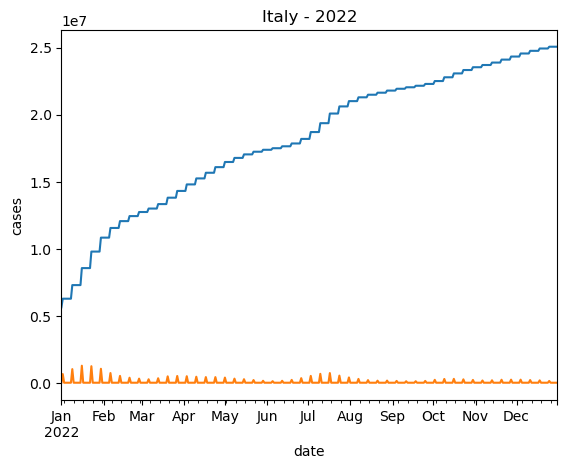

In [72]:
#Creo un DataFrame filtrando per location "Italy"
df_Italy = tab_raw_excel[tab_raw_excel["location"] == "Italy"]
#Inserisco una colonna che mi estrae l'anno dalla data
df_Italy["year"]=df_Italy["date"].dt.year
#Creo un DataFrame filtrando per anno "2022"
df_Italy_2022=df_Italy[df_Italy["year"]==2022]
df_Italy_2022=df_Italy_2022.set_index("date")
df_Italy_2022["total_cases"].plot(title="Italy - 2022", xlabel="date", ylabel="cases")
df_Italy_2022["new_cases"].plot()

In [69]:
#Mi creo la colonna cumulativa da aggiungere al DataFrame
cumulative_new_cases=[]
var=0
for i in range(len(df_Italy_2022["new_cases"])):
    var=var + df_Italy_2022["new_cases"].iloc[i]
    cumulative_new_cases.append(var)

#Trasformo la lista in un dataframe Pandas e uso concat per unire cumulative_new_cases al dataframe precedente
df_da_unire = pd.DataFrame(cumulative_new_cases)
df_Italy_2022_2=pd.concat([df_Italy_2022,df_da_unire],axis = 1)
lista_col=df_Italy_2022.columns
df_Italy_2022_2.columns = [lista_col,"cumulative_new_values"]
#print(df_Italy_2022_2)
#df_Italy_2022_2["cumulative_new_cases"].plot()
df_Italy_2022["total_cases"].plot(title="Italy - 2022")


ValueError: Length mismatch: Expected axis has 68 elements, new values have 2 elements

• Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo

                       iso_code continent  total_cases  new_cases  \
location    date                                                    
Afghanistan 2020-01-05      AFG      Asia          NaN        0.0   
            2020-01-06      AFG      Asia          NaN        0.0   
            2020-01-07      AFG      Asia          NaN        0.0   
            2020-01-08      AFG      Asia          NaN        0.0   
            2020-01-09      AFG      Asia          NaN        0.0   
...                         ...       ...          ...        ...   
Zimbabwe    2024-05-15      ZWE    Africa     266362.0        0.0   
            2024-05-16      ZWE    Africa     266362.0        0.0   
            2024-05-17      ZWE    Africa     266362.0        0.0   
            2024-05-18      ZWE    Africa     266362.0        0.0   
            2024-05-19      ZWE    Africa     266362.0        0.0   

                        new_cases_smoothed  total_deaths  new_deaths  \
location    date              

• Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna — se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.